### **0. Preparation**


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from collections import deque
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### **1. Input Data**
load the training data file ('data.txt')  
each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$  
$x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

In [90]:
uploaded = files.upload()

Saving test.txt to test.txt


Plotting the training data


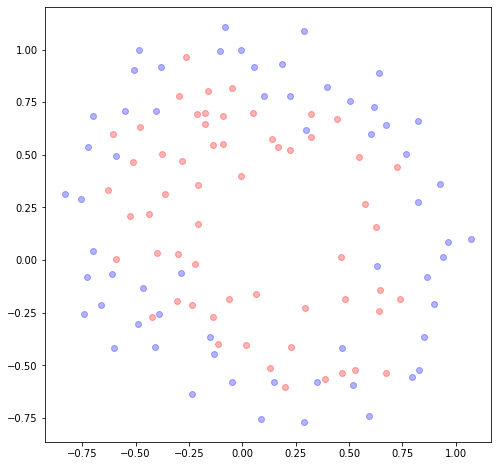

X [ 0.051267  -0.092742  -0.21371   -0.375     -0.51325   -0.52477
 -0.39804   -0.30588    0.016705   0.13191    0.38537    0.52938
  0.63882    0.73675    0.54666    0.322      0.16647   -0.046659
 -0.17339   -0.47869   -0.60541   -0.62846   -0.59389   -0.42108
 -0.11578    0.20104    0.46601    0.67339   -0.13882   -0.29435
 -0.26555   -0.16187   -0.17339   -0.28283   -0.36348   -0.30012
 -0.23675   -0.06394    0.062788   0.22984    0.2932     0.48329
  0.64459    0.46025    0.6273     0.57546    0.72523    0.22408
  0.44297    0.322      0.13767   -0.0063364 -0.092742  -0.20795
 -0.20795   -0.43836   -0.21947   -0.13882    0.18376    0.22408
  0.29896    0.50634    0.61578    0.60426    0.76555    0.92684
  0.82316    0.96141    0.93836    0.86348    0.89804    0.85196
  0.82892    0.79435    0.59274    0.51786    0.46601    0.35081
  0.28744    0.085829   0.14919   -0.13306   -0.40956   -0.39228
 -0.74366   -0.69758   -0.75518   -0.69758   -0.4038    -0.38076
 -0.50749   -0.54781  

In [107]:
data = np.genfromtxt("test.txt", delimiter=',')
x = data[:, 0]
y = data[:, 1]
label = data[:, 2]
x_label0 = x[label == 0]
x_label1 = x[label == 1]
y_label0 = y[label == 0]
y_label1 = y[label == 1]

print("Plotting the training data")
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

print("X",x) #100
print("Y",y)
print(label[57])
print(label[58])
#print(type(x))
#print(y_label0)
#print(type(x_label0))

### **2. Logistic Regression**
1) Linear Model
<br>
$\ z = \theta_0 + \theta_1x + \theta_2y  $  
$\sigma(z) = \frac{1}{1 + \exp(-z)}$
<br>  
2) Objective Function
<br>
$\ J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$
<br>  
3) Gradient Descent
<br>
$\ \theta_0^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)})$  
$\ \theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) x^{(i)}$  
$\ \theta_2^{(t+1)} = \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) y^{(i)}$  
<br>
4) HyperParameters Setting
<br>
$\ \theta_0^{(0)} = -10$  
$\ \theta_1^{(0)} = 20$  
$\ \theta_2^{(0)} = -10$
<br>
$\ lr = 2*10^{-2}$



In [0]:
def sigmoidFunction(z):
  result = 1/(1 + np.exp(-z))
  return result

In [0]:
def objectiveFunction(x_data, y_data, class_data, theta_0, theta_1, theta_2, theta_3, theta_4, theta_5):
  cost = 0
  predictions = deque()
  for i in range(0, 118):
    estimate = sigmoidFunction(theta_0 + theta_1 * x_data[i] + theta_2 * y_data[i] + theta_3 * x_data[i] * y_data[i] + theta_4 * np.power(x_data[i],2) + theta_5 * np.power(y_data[i],2)) 
    #print(estimate)
    #print("Estimate",estimate)
    predictions.append((-class_data[i]*np.log(estimate)) - (1-class_data[i])*np.log(1-estimate))
    #print("predictions",predictions)
  cost = np.sum(predictions) / 118
  #print("Cost출력",cost)
  return cost

In [0]:
def gradientDescent(x_data, y_data, class_data, theta_0, theta_1, theta_2, theta_3, theta_4, theta_5):
  for i in range(0, 118):
    lr = 3e-4
    estimate = sigmoidFunction(theta_0 + theta_1 * x_data[i] + theta_2 * y_data[i] + theta_3 * x_data[i] * y_data[i] + theta_4 * np.power(x_data[i],2) + theta_5 * np.power(y_data[i],2) ) - class_data[i]
    theta_0 -= lr * estimate / 118
    theta_1 -= lr * estimate * x_data[i] / 118
    theta_2 -= lr * estimate * y_data[i] / 118
    theta_3 -= lr * estimate * x_data[i] * y_data[i] / 118
    theta_4 -= lr * estimate * np.power(x_data[i],2) / 118
    theta_5 -= lr * estimate * np.power(y_data[i],2) / 118
  return theta_0, theta_1, theta_2, theta_3, theta_4, theta_5

Plotting the Estimated Parameters


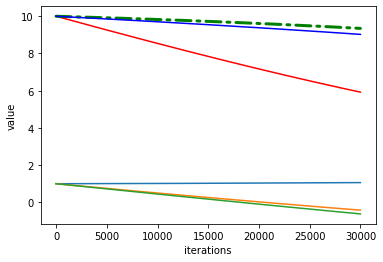

Plotting the Training Error


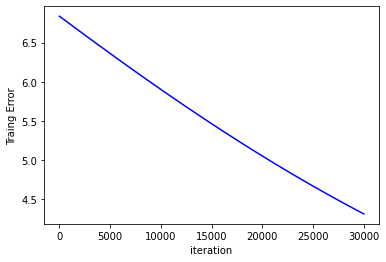

Plotting the Training Accuracy


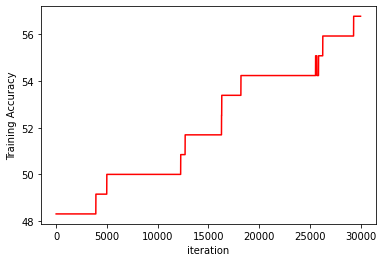

5.921290258496175 9.347390791291595 9.02568797433569


In [112]:
def main():
  theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 = 10, 10, 10, 1, 1, 1  #Initialization
  train_costs = deque()
  theta_0s = deque()
  theta_1s = deque()
  theta_2s = deque()
  theta_3s = deque()
  theta_4s = deque()
  theta_5s = deque()
  iters = deque()
  accuracys = deque()

  for iter in range(0, 30000):
    theta_0s.append(theta_0)
    theta_1s.append(theta_1)
    theta_2s.append(theta_2)
    theta_3s.append(theta_3)
    theta_4s.append(theta_4)
    theta_5s.append(theta_5)
    
    check = 0
    for i in range(0, 57):
      if theta_0 + theta_1 * x[i] + theta_2 * y[i] + theta_3 * x[i] * y[i] + theta_4 * np.power(x[i],2) + theta_5 * np.power(y[i],2) >= 0:
        check += 1
    for i in range(58, 118):
      if theta_0 + theta_1 * x[i] + theta_2 * y[i] + theta_3 * x[i] * y[i] + theta_4 * np.power(x[i],2) + theta_5 * np.power(y[i],2)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys.append(accuracy)

    train_value = objectiveFunction(x, y, label, theta_0, theta_1, theta_2, theta_3, theta_4, theta_5)
    #train data 수집
    train_costs.append(train_value)
    theta_0, theta_1, theta_2, theta_3, theta_4 ,theta_5= gradientDescent(x, y, label, theta_0, theta_1, theta_2, theta_3, theta_4, theta_5)
    iters.append(iter)

    #print("thetas",theta_0,theta_1,theta_2,theta_3,theta_4)
  
  print("Plotting the Estimated Parameters")
  fig = plt.figure()
  graph1 = plt.plot(iters, theta_0s, 'r')
  graph2 = plt.plot(iters, theta_1s, 'g', linewidth = 3, linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
  graph3 = plt.plot(iters, theta_2s, 'b')
  graph4 = plt.plot(iters, theta_3s)
  graph5 = plt.plot(iters, theta_4s)
  graph6 = plt.plot(iters, theta_5s)
  plt.xlabel('iterations')
  plt.ylabel('value')
  plt.show()
  
  print("Plotting the Training Error")
  plt.plot(iters, train_costs, 'b')
  plt.xlabel('iteration')
  plt.ylabel('Traing Error')
  plt.show()

  print("Plotting the Training Accuracy")
  plt.plot(iters, accuracys, 'r')
  plt.xlabel('iteration')
  plt.ylabel('Training Accuracy')
  plt.show()

  print(theta_0, theta_1, theta_2)
"""
  print("Plotting the Obtained Classifer")
  points = np.arange(30,100,0.5)
  xs,ys = np.meshgrid(points, points)
  z = theta_0 + theta_1 * xs + theta_2 * ys
  z = sigmoidFunction(z)

  fig = plt.figure()
  plt.xlim([30,100])
  plt.ylim([30,100])
  graph4 = plt.imshow(z, cmap=plt.cm.bwr)
  graph5 = plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
  graph6 = plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
  plt.show()
"""
if __name__ == "__main__":
  main()